In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

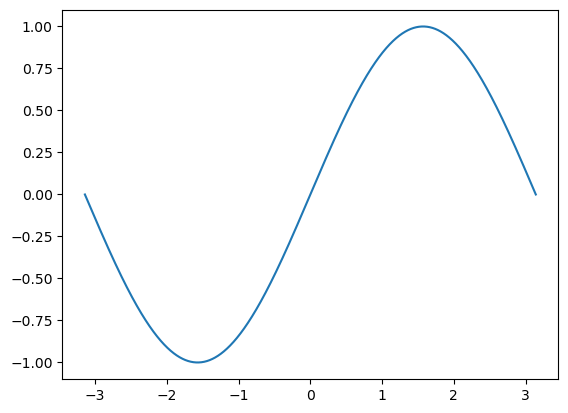

In [2]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

plt.figure()
plt.plot(x, y)

xx = x.unsqueeze(-1).pow(torch.tensor([1, 2, 3]))

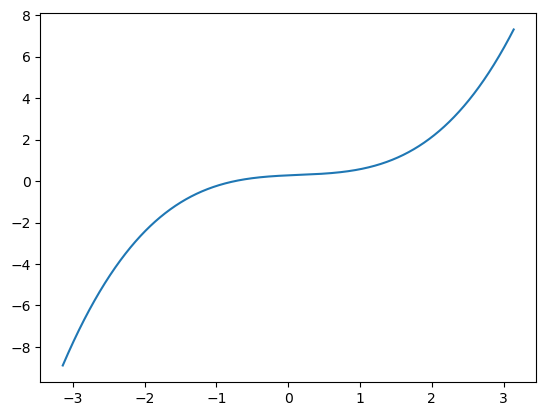

99 400.1061096191406
199 224.91217041015625
299 121.95867919921875
399 65.0014877319336
499 35.50001525878906


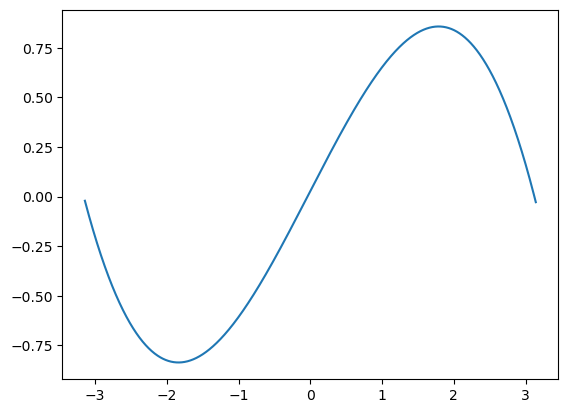

599 21.066974639892578
699 14.308469772338867
799 11.24045467376709
899 9.876277923583984
999 9.27756404876709


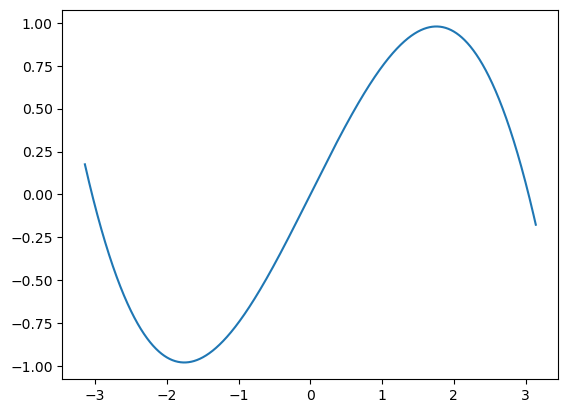

1099 9.016786575317383
1199 8.90365219116211
1299 8.854647636413574
1399 8.833427429199219
1499 8.82422924041748


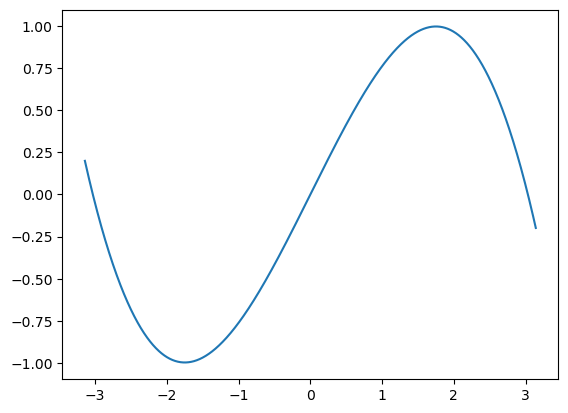

1599 8.820244789123535
1699 8.818511962890625
1799 8.817760467529297
1899 8.817424774169922
1999 8.81727409362793


In [3]:
model = torch.nn.Sequential(
    torch.nn.Linear(3, 10),
    torch.nn.Linear(10, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')
lr = 1e-6

for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    if t % 500 == 0:
        plt.plot(x, y_pred.detach().numpy())
        plt.show()
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad

In [4]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4544,  0.2973,  0.0191],
                      [-0.3039, -0.0846, -0.4766],
                      [-0.1055, -0.3332,  0.4293],
                      [-0.1018, -0.3161, -0.2155],
                      [-0.3708, -0.5191,  0.3173],
                      [-0.6928,  0.1353, -0.4012],
                      [ 0.2525,  0.1771, -0.5172],
                      [-0.4797,  0.4345,  0.3210],
                      [ 0.0326,  0.3933,  0.5599],
                      [ 0.2608, -0.1080,  0.0083]])),
             ('0.bias',
              tensor([-0.1815,  0.5212, -0.0860,  0.2181, -0.0754, -0.2453,  0.0751,  0.5883,
                      -0.3862, -0.3126])),
             ('1.weight',
              tensor([[-0.3488,  0.0529,  0.0788, -0.2308, -0.5017, -0.3787,  0.0882, -0.3915,
                        0.0579,  0.1476]])),
             ('1.bias', tensor([0.1276]))])

In [5]:
linear_layer = model[1]

In [6]:
linear_layer.weight[:, 0]

tensor([-0.3488], grad_fn=<SelectBackward0>)

In [7]:
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

Result: y = 0.12764741480350494 + -0.3488294780254364 x + 0.05290383845567703 x^2 + 0.07882353663444519 x^3


In [8]:
y_result = linear_layer.bias.item() + \
           linear_layer.weight[:, 0].item()*x + \
           linear_layer.weight[:, 1].item()*x**2 + \
           linear_layer.weight[:, 2].item()*x**3

In [9]:
y_result

tensor([-0.6984, -0.6932, -0.6880,  ...,  1.9834,  1.9907,  1.9979])

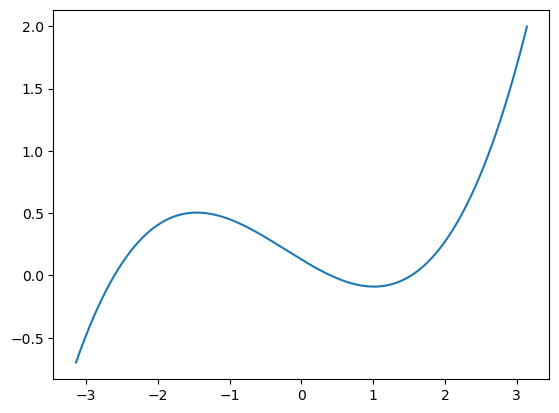

In [10]:
plt.plot(x, y_result)